<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/QML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer,QuantumRegister,execute,ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import seaborn as sns
Ssim = Aer.get_backend('statevector_simulator')
sim = Aer.get_backend('aer_simulator') 
Msim = Aer.get_backend('qasm_simulator') 


In [ ]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()

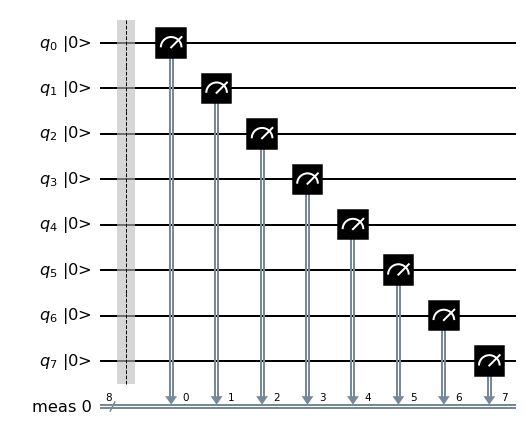

In [ ]:
qc_output.draw('mpl',initial_state=True)


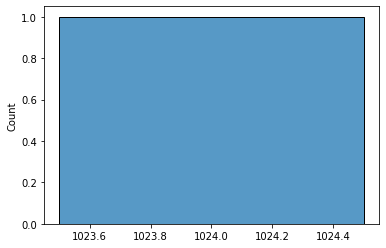

In [ ]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
sns.histplot(counts);

# Hello World QML

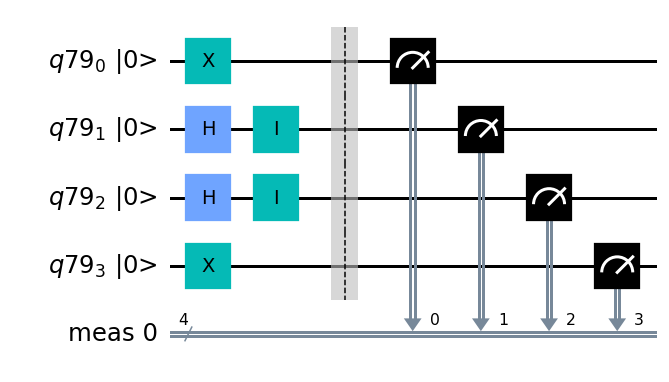

In [ ]:
q = QuantumRegister(4)
hello_qubit = QuantumCircuit(q)

hello_qubit.x([q[0],q[3]])
hello_qubit.h([q[1],q[2]])
hello_qubit.i([q[1],q[2]])
hello_qubit.measure_all()
hello_qubit.draw(output='mpl',initial_state=True,scale=1.5)


In [ ]:
job = execute(hello_qubit,backend=S_simulator)
result = job.result()

In [ ]:
result.get_statevector()

Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -1.+1.2246468e-16j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j],
            dims=(2, 2, 2, 2))


In [ ]:
q1 = QuantumRegister(2)
q1_circut = QuantumCircuit(q1)
q1_circut.h(q1[0])

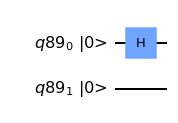

In [ ]:
q1_circut.draw(output='mpl',initial_state=True)

In [ ]:
q1_result = execute(q1_circut,S_simulator).result()

In [ ]:
q1_result.get_statevector()

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


In [ ]:
qq  = QuantumRegister(2,name='q_bit')
qc = ClassicalRegister(2,name='c_bit')

qqc = QuantumCircuit(qq,qc)


In [ ]:
qqc.h(qq[0])
qqc.h(qq[1])

In [ ]:
qqc.measure(qq,qc)

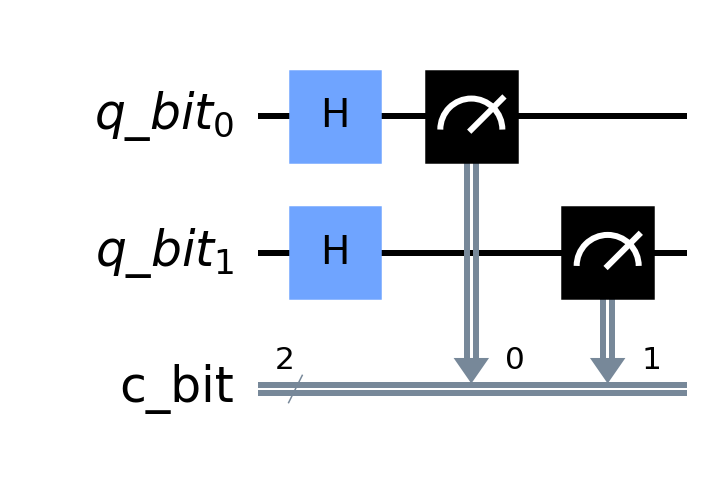

In [ ]:
qqc.draw(output='mpl',scale=3)

In [ ]:
job1 = execute(qqc,Msim,shots=100).result()

In [ ]:
count = job1.get_counts()

In [ ]:
count.values()

dict_values([27, 23, 21, 29])

In [ ]:
count.keys()

dict_keys(['10', '00', '11', '01'])

In [ ]:
count

{'00': 23, '01': 29, '10': 27, '11': 21}

# Quantum coin flip 

In [ ]:
def coin_flip(trials):
  q = QuantumRegister(1)
  c = ClassicalRegister(1)
  qc = QuantumCircuit(q,c)
  # Apply the hadmard gate to put your qubit in superposition
  qc.h(q[0])
  # make measurements
  job = qc.measure(q,c)
  result =  execute(qc,backend=Msim,shots=trials).result().get_counts(qc)
  heads=result['0']
  tails=result['1']
  return heads,tails

In [ ]:
coin_flip(100)

(47, 53)